In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

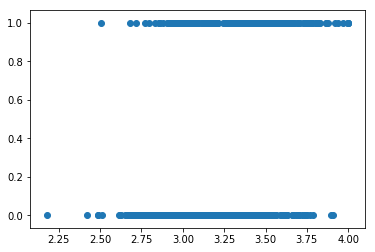

In [74]:
admissions = pd.read_csv('data/admissions.csv')

plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

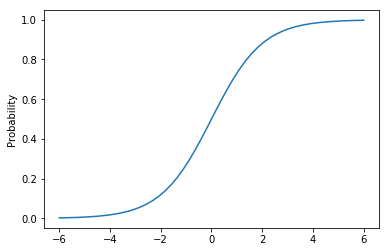

In [75]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logistic_model = LogisticRegression()

In [78]:
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

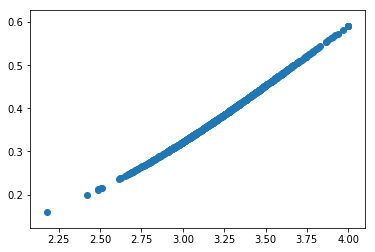

In [79]:
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'], pred_probs[:, 1])
plt.show()

In [80]:
admissions['predicted_label'] = logistic_model.predict(admissions[['gpa']])
admissions = admissions.rename(columns={'admit': 'actual_label'})
admissions['matches'] = admissions['actual_label'] == admissions['predicted_label']
correct_predictions = admissions[admissions['matches'] == True]
accuracy = admissions['matches'].sum() / admissions.shape[0]
accuracy

0.6459627329192547

In [81]:
true_positives = admissions[(admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)].shape[0]
true_negatives = admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)].shape[0]
false_negatives = admissions[(admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)].shape[0]
false_positives = admissions[(admissions['predicted_label'] == 1) & (admissions['actual_label'] == 0)].shape[0]

### Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted:

In [82]:
sensitivity = true_positives / (true_positives + false_negatives)
sensitivity

0.12704918032786885

### Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:

In [83]:
specificity = true_negatives / (false_positives + true_negatives)
specificity

0.9625